In [86]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
##### Data Load
dat_dir = 'C:/Users/pc-user/Desktop/yscho/Hanhwa/'
dat = pd.read_csv(dat_dir+'Regression_2_ToyotaCorolla.csv')
display(HTML(dat.to_html()))


In [88]:
##### Data Preprocessing
# split x variable to y variable
x,y = dat.drop(['Id', 'Model', 'Price'], axis=1), dat['Price']

In [89]:
X = pd.DataFrame(x)

In [90]:
X

Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  \
0            23         10      2002  46986    Diesel   90          1   
1            23         10      2002  72937    Diesel   90          1   
2            24          9      2002  41711    Diesel   90          1   
3            26          7      2002  48000    Diesel   90          0   
4            30          3      2002  38500    Diesel   90          0   
5            32          1      2002  61000    Diesel   90          0   
6            27          6      2002  94612    Diesel   90          1   
7            30          3      2002  75889    Diesel   90          1   
8            27          6      2002  19700    Petrol  192          0   
9            23         10      2002  71138    Diesel   69          0   
10           25          8      2002  31461    Petrol  192          0   
11           22         11      2002  43610    Petrol  192          0   
12           25          8      2002  32189    Petrol  192          0   
13           31          2      2002  23000    Petrol  192          1   
14           32          1      2002  34131    Petrol  192          1   
15           28          5      2002  18739    Petrol  192          0   
16           30          3      2002  34000    Petrol  192          1   
17           24          9      2002  21716    Petrol  110          1   
18           24          9      2002  25563    Petrol  110          0   
19           30          3      2002  64359    Petrol  110          1   
20           30          3      2002  67660    Petrol  110          1   
21           29          4      2002  43905    Petrol  110          0   
22           28          5      2002  56349    Petrol  110          1   
23           28          5      2002  32220    Petrol  110          1   
24           29          4      2002  25813    Petrol  110          1   
25           25          8      2002  28450    Petrol  110          1   
26           27          6      2002  34545    Petrol  110          1   
27           29          4      2002  41415    Petrol  110          1   
28           28          5      2002  44142    Petrol  110          0   
29           30          3      2002  11090    Petrol  110          1   
...         ...        ...       ...    ...       ...  ...        ...   
1406         70         11      1998  44850    Petrol  110          1   
1407         69         12      1998  44826    Petrol  110          0   
1408         80          1      1998  44444    Petrol  110          1   
1409         75          6      1998  43720    Petrol  110          1   
1410         78          3      1998  43622    Petrol   86          1   
1411         76          5      1998  43532    Petrol  110          0   
1412         69         12      1998  42800    Petrol  110          1   
1413         74          7      1998  42317    Petrol  107          1   
1414         80          1      1998  42186    Petrol  110          1   
1415         72          9      1998  42000    Petrol  110          1   
1416         79          2      1998  40093    Petrol  110          0   
1417         79          2      1998  39800    Petrol  107          0   
1418         73          8      1998  39168    Petrol   86          0   
1419         75          6      1998  38945    Petrol  110          1   
1420         76          5      1998  36537    Petrol  110          0   
1421         78          3      1998  36000    Petrol   86          0   
1422         78          3      1998  36000    Petrol  110          1   
1423         80          1      1998  35821    Petrol   86          0   
1424         73          8      1998  34717    Petrol   86          0   
1425         80          1      1998  34000    Petrol   86          1   
1426         78          3      1998  30964    Petrol  110          0   
1427         71         10      1998  29000    Petrol   86          1   
1428         72          9      1998  26000    Petrol   86      

In [91]:
##### Preprocessing
X_categorical = X['Fuel_Type']

In [92]:
dummies = pd.get_dummies(X_categorical)
dummies

CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
5       0       1       0
6       0       1       0
7       0       1       0
8       0       0       1
9       0       1       0
10      0       0       1
11      0       0       1
12      0       0       1
13      0       0       1
14      0       0       1
15      0       0       1
16      0       0       1
17      0       0       1
18      0       0       1
19      0       0       1
20      0       0       1
21      0       0       1
22      0       0       1
23      0       0       1
24      0       0       1
25      0       0       1
26      0       0       1
27      0       0       1
28      0       0       1
29      0       0       1
...   ...     ...     ...
1406    0       0       1
1407    0       0       1
1408    0       0       1
1409    0       0       1
1410    0       0       1
1411    0       0       1
1412    0       0       1
1413    0       0       1
1414    0       0       1
1415    0       0       1
1416    0       0       1
1417    0       0       1
1418    0       0       1
1419    0       0       1
1420    0       0       1
1421    0       0       1
1422    0       0       1
1423    0       0       1
1424    0       0       1
1425    0       0       1
1426    0       0       1
1427    0       0       1
1428    0       0       1
1429    0       0       1
1430    0       0       1
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       1
1435    0       0       1

[1436 rows x 3 columns]

In [93]:
X_numeric = X.drop('Fuel_Type', axis=1)

In [94]:
X_processing = pd.concat((dummies,X_numeric), axis = 1)
X_processing

CNG  Diesel  Petrol  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  \
0       0       1       0         23         10      2002  46986   90   
1       0       1       0         23         10      2002  72937   90   
2       0       1       0         24          9      2002  41711   90   
3       0       1       0         26          7      2002  48000   90   
4       0       1       0         30          3      2002  38500   90   
5       0       1       0         32          1      2002  61000   90   
6       0       1       0         27          6      2002  94612   90   
7       0       1       0         30          3      2002  75889   90   
8       0       0       1         27          6      2002  19700  192   
9       0       1       0         23         10      2002  71138   69   
10      0       0       1         25          8      2002  31461  192   
11      0       0       1         22         11      2002  43610  192   
12      0       0       1         25          8      2002  32189  192   
13      0       0       1         31          2      2002  23000  192   
14      0       0       1         32          1      2002  34131  192   
15      0       0       1         28          5      2002  18739  192   
16      0       0       1         30          3      2002  34000  192   
17      0       0       1         24          9      2002  21716  110   
18      0       0       1         24          9      2002  25563  110   
19      0       0       1         30          3      2002  64359  110   
20      0       0       1         30          3      2002  67660  110   
21      0       0       1         29          4      2002  43905  110   
22      0       0       1         28          5      2002  56349  110   
23      0       0       1         28          5      2002  32220  110   
24      0       0       1         29          4      2002  25813  110   
25      0       0       1         25          8      2002  28450  110   
26      0       0       1         27          6      2002  34545  110   
27      0       0       1         29          4      2002  41415  110   
28      0       0       1         28          5      2002  44142  110   
29      0       0       1         30          3      2002  11090  110   
...   ...     ...     ...        ...        ...       ...    ...  ...   
1406    0       0       1         70         11      1998  44850  110   
1407    0       0       1         69         12      1998  44826  110   
1408    0       0       1         80          1      1998  44444  110   
1409    0       0       1         75          6      1998  43720  110   
1410    0       0       1         78          3      1998  43622   86   
1411    0       0       1         76          5      1998  43532  110   
1412    0       0       1         69         12      1998  42800  110   
1413    0       0       1         74          7      1998  42317  107   
1414    0       0       1         80          1      1998  42186  110   
1415    0       0       1         72          9      1998  42000  110   
1416    0       0       1         79          2      1998  40093  110   
1417    0       0       1         79          2      1998  39800  107   
1418    0       0       1         73          8      1998  39168   86   
1419    0       0       1         75          6      1998  38945  110   
1420    0       0       1         76          5      1998  36537  110   
1421    0       0       1         78          3      1998  36000   86   
1422    0       0       1         78          3      1998  36000  110   
1423    0       0       1         80          1      1998  35821   86   
1424    0       0       1         73          8      1998  34717   86   
1425    0       0       1         80          1      1998  34000   86   
1426    0       0       1         78          3      1998  30964  110   
1427    0       0       1         71         10      1998  29000   86   
1428    0       0       1         72          9      1998  26000

In [95]:
X_processed = preprocessing.minmax_scale(X_processing)
X_processed = pd.DataFrame(X_processed)
X_processed.columns = X_processing.columns
X_processed

CNG  Diesel  Petrol  Age_08_04  Mfg_Month  Mfg_Year        KM        HP  \
0     0.0     1.0     0.0   0.278481   0.818182  0.666667  0.193355  0.170732   
1     0.0     1.0     0.0   0.278481   0.818182  0.666667  0.300149  0.170732   
2     0.0     1.0     0.0   0.291139   0.727273  0.666667  0.171647  0.170732   
3     0.0     1.0     0.0   0.316456   0.545455  0.666667  0.197528  0.170732   
4     0.0     1.0     0.0   0.367089   0.181818  0.666667  0.158433  0.170732   
5     0.0     1.0     0.0   0.392405   0.000000  0.666667  0.251026  0.170732   
6     0.0     1.0     0.0   0.329114   0.454545  0.666667  0.389347  0.170732   
7     0.0     1.0     0.0   0.367089   0.181818  0.666667  0.312298  0.170732   
8     0.0     0.0     1.0   0.329114   0.454545  0.666667  0.081066  1.000000   
9     0.0     1.0     0.0   0.278481   0.818182  0.666667  0.292746  0.000000   
10    0.0     0.0     1.0   0.303797   0.636364  0.666667  0.129466  1.000000   
11    0.0     0.0     1.0   0.265823   0.909091  0.666667  0.179462  1.000000   
12    0.0     0.0     1.0   0.303797   0.636364  0.666667  0.132461  1.000000   
13    0.0     0.0     1.0   0.379747   0.090909  0.666667  0.094646  1.000000   
14    0.0     0.0     1.0   0.392405   0.000000  0.666667  0.140453  1.000000   
15    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.077111  1.000000   
16    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.139914  1.000000   
17    0.0     0.0     1.0   0.291139   0.727273  0.666667  0.089363  0.333333   
18    0.0     0.0     1.0   0.291139   0.727273  0.666667  0.105194  0.333333   
19    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.264849  0.333333   
20    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.278433  0.333333   
21    0.0     0.0     1.0   0.354430   0.272727  0.666667  0.180676  0.333333   
22    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.231886  0.333333   
23    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.132589  0.333333   
24    0.0     0.0     1.0   0.354430   0.272727  0.666667  0.106223  0.333333   
25    0.0     0.0     1.0   0.303797   0.636364  0.666667  0.117075  0.333333   
26    0.0     0.0     1.0   0.329114   0.454545  0.666667  0.142157  0.333333   
27    0.0     0.0     1.0   0.354430   0.272727  0.666667  0.170429  0.333333   
28    0.0     0.0     1.0   0.341772   0.363636  0.666667  0.181651  0.333333   
29    0.0     0.0     1.0   0.367089   0.181818  0.666667  0.045634  0.333333   
...   ...     ...     ...        ...        ...       ...       ...       ...   
1406  0.0     0.0     1.0   0.873418   0.909091  0.000000  0.184565  0.333333   
1407  0.0     0.0     1.0   0.860759   1.000000  0.000000  0.184466  0.333333   
1408  0.0     0.0     1.0   1.000000   0.000000  0.000000  0.182894  0.333333   
1409  0.0     0.0     1.0   0.936709   0.454545  0.000000  0.179914  0.333333   
1410  0.0     0.0     1.0   0.974684   0.181818  0.000000  0.179511  0.138211   
1411  0.0     0.0     1.0   0.949367   0.363636  0.000000  0.179141  0.333333   
1412  0.0     0.0     1.0   0.860759   1.000000  0.000000  0.176128  0.333333   
1413  0.0     0.0     1.0   0.924051   0.545455  0.000000  0.174141  0.308943   
1414  0.0     0.0     1.0   1.000000   0.000000  0.000000  0.173602  0.333333   
1415  0.0     0.0     1.0   0.898734   0.727273  0.000000  0.172836  0.333333   
1416  0.0     0.0     1.0   0.987342   0.090909  0.000000  0.164988  0.333333   
1417  0.0     0.0     1.0   0.987342   0.090909  0.000000  0.163783  0.308943   
1418  0.0     0.0     1.0   0.911392   0.636364  0.000000  0.161182  0.138211   
1419  0.0     0.0     1.0   0.936709   0.454545  0.000000  0.160264  0.333333   
1420  0.0     0.0     1.0   0.949367   0.363636  0.000000  0.150355  0.333333   
1421  0.0     0.0     1.0   0.974684   0.181818  0.000000  0.148145  0.138211   
1422  0.0     0.0     1.0   0.974684   0.181818  0.000000  0.148145  0.333333   
1423  0.0     0.0     1.0   1.000000 

In [96]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1005, 36) (431, 36) (1005,) (431,)


In [97]:
# Training the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     299.0
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        07:57:32   Log-Likelihood:                -8449.9
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     971   BIC:                         1.713e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CNG              -3.559e+14   2.64e+15     -0.135      0.893   -5.54e+15    4.82e+15
Diesel           -3.559e+14   2.64e+15     -0.135      0.893   -5.54e+15    4.82e+15
Petrol           -3.559e+14   2.64e+15     -0.135      0.893   -5.54e+15    4.82e+15
Age_08_04         3.559e+14   2.64e+15      0.135      0.893   -4.82e+15    5.54e+15
Mfg_Month         4.956e+13   3.67e+14      0.135      0.893   -6.72e+14    7.71e+14
Mfg_Year          3.244e+14   2.41e+15      0.135      0.893    -4.4e+15    5.04e+15
KM               -4315.5257    332.131    -12.993      0.000   -4967.303   -3663.748
HP                3548.2912    430.733      8.238      0.000    2703.016    4393.566
Met_Color          -20.2678     81.029     -0.250      0.803    -179.279     138.744
Automatic          563.2135    154.350      3.649      0.000     260.316     866.111
cc               -1168.8557   1148.612     -1.018      0.309   -3422.904    1085.193
Doors              248.3095    125.966      1.971      0.049       1.113     495.506
Cylinders           -0.2611      1.936     -0.135      0.893      -4.060       3.538
Gears              844.1912    674.971      1.251      0.211    -480.379    2168.762
Quarterly_Tax     2964.4462    517.750      5.726      0.000    1948.409    3980.484
Weight            5034.8913    776.337      6.485      0.000    3511.399    6558.383
Mfr_Guarantee      234.1076     78.523      2.981      0.003      80.014     388.201
BOVAG_Guarantee    490.3846    138.074      3.552      0.000     219.428     761.342
Guarantee_Period  1809.2463    451.897      4.004      0.000     922.439    2696.054
ABS               -302.6712    136.617     -2.215      0.027    -570.770     -34.573
Airbag_1            31.7178    275.161      0.115      0.908    -508.261     571.696
Airbag_2           -77.0621    139.423     -0.553      0.581    -350.667     196.543
Airco              181.4685     94.017      1.930      0.054      -3.032     365.969
Automatic_airco   2064.2163    201.092     10.265      0.000    1669.590    2458.842
Boardcomputer     -251.7643    128.118     -1.965      0.050    -503.185      -0.343
CD_Player          263.9560    102.469      2.576      0.010      62.869     465.043
Central_Lock       -15.1831    150.157     -0.101      0.919    -309.854     279.487
Powered_Windows    419.1718    149.151      2.810      0.005     126.477     711.866
Power_Steering    -186.1396    309.034     -0.602      0.547    -792.591     420.312
Radio             -657.9814    807.376     -0.815      0.415   -2242.385     926.422
Mistlamps           -2.1552    118.371     -0.018      0.985    -234.448     230.137
Sport_Model        416.8418     94.304      4.420      0.000     231.779     601.905
Backseat_Divider  -313.6948    136.178     -2.304      0.021    -580.932     -46.458
Metallic_Rim       156.

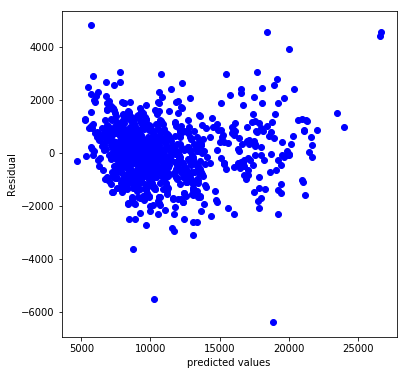

In [98]:
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.show()

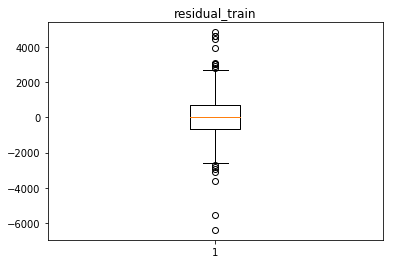

In [99]:
# Check the Model Assumption: residual by boxplot
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

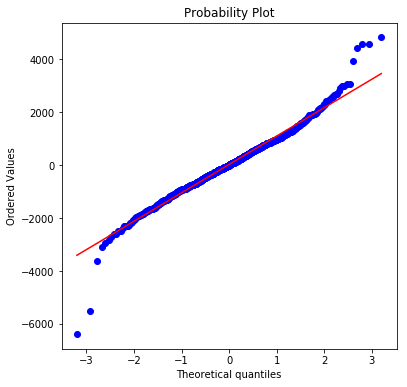

In [100]:
# Check the Model Assumption: normal distribution
plt.figure(figsize=(6,6))
stats.probplot(lm_trained.resid, dist='norm', plot=pylab)
pylab.show()

In [101]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
y_pred_train

439     10560.415841
319     12317.464568
13      21452.403129
1255     8291.696702
942     10445.695692
279     13600.811507
1155     8204.962998
451     11192.203283
4       16054.753539
961     10692.919529
1365     8351.217869
152     17604.779902
937     10085.597480
479     11333.740733
1232     7678.038221
1409     8531.416315
928     10678.130278
1000     8912.116558
1229     7870.751170
1284     8324.507070
298     13681.727466
341     13552.052915
1324     8180.794692
1199     8054.263222
870      9449.730056
914     10464.149058
1376     8958.826597
106     16537.664645
450     11149.159852
396      9992.850235
            ...     
476     11081.993802
247     12688.448438
916      8495.116997
216     12646.078824
372     12690.043272
431     10490.398576
77      15443.231874
1164     8817.556509
1146     7388.314847
954      9168.736259
1072     7778.003660
987      8071.182883
1386     8747.328598
499      9851.777621
958      8725.270627
540     12110.100925
1373     8684

In [102]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
y_pred_test

1035    11114.234305
357     14256.797816
805     10022.820154
347     13426.171700
31      15336.024015
314     12020.386445
348     12364.443614
1201     7516.724863
905      8936.281363
1431     8679.337428
447     10777.518367
1174     7610.937872
826      9160.336638
1007    10291.722683
1347     7923.673988
1134     7675.768528
56      14853.225069
353     13138.678466
1412     8573.947035
688      7928.093154
897      8572.982117
760      7709.085307
1221     7294.850878
567     11573.539786
487     11505.454097
675      8635.893886
180     19334.252501
558     11553.209156
1216     8866.874838
775      9238.413286
            ...     
1087     6684.838887
478     10935.701227
1334     8141.838275
1055     6495.821081
1259     8211.511016
1335     8335.875076
1206     8333.693405
919     10302.009456
857     10145.374138
1181     5846.404481
965      9909.975876
1239     7131.153196
1080     8329.641709
1036     9829.705887
589     10320.262320
1191     7418.876519
139     19085

In [103]:
# performance measure: MSE, MAE, MAPE, Rsquared

In [104]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 1176208.56, mse_test: 1351101.26


In [105]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 819.62, mae_test: 834.79


In [106]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [107]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))


mape_train: 8.15, mape_test: 8.61


In [108]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.91, r2_test: 0.90


In [109]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train)
print(residual_test)


439    -1939.584159
319      367.464568
13       -47.596871
1255     341.696702
942      -54.304308
279    -1389.188493
1155     254.962998
451     -557.796717
4       2304.753539
961     1942.919529
1365     401.217869
152     -845.220098
937     1135.597480
479     -616.259267
1232     178.038221
1409     631.416315
928      728.130278
1000     -37.883442
1229    -829.248830
1284    -625.492930
298     -313.272534
341     1602.052915
1324    -319.205308
1199   -1145.736778
870     -400.269944
914      514.149058
1376    1158.826597
106    -2262.335355
450      649.159852
396       42.850235
           ...     
476      831.993802
247     -211.551562
916      545.116997
216     -853.921176
372      740.043272
431     -459.601424
77     -3006.768126
1164    -132.443491
1146     488.314847
954      268.736259
1072    1328.003660
987    -1878.817117
1386   -1002.671402
499      -98.222379
958     -224.729373
540     1160.100925
1373     734.039164
541     -652.620755
1025    -888.357678


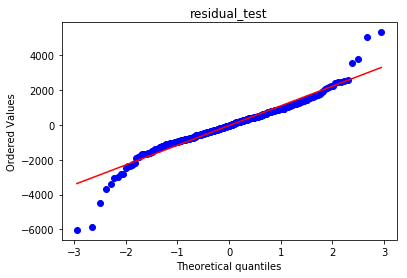

In [110]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

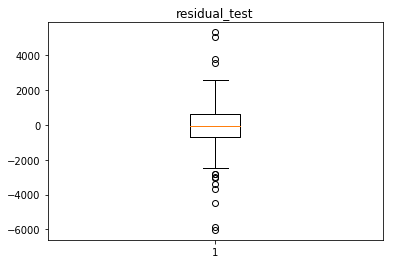

In [111]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

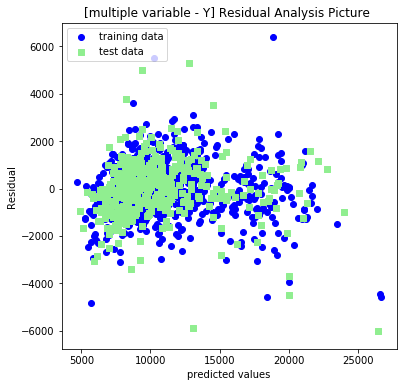

In [112]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()
